In [20]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('advertising (2).csv')

In [5]:
df


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


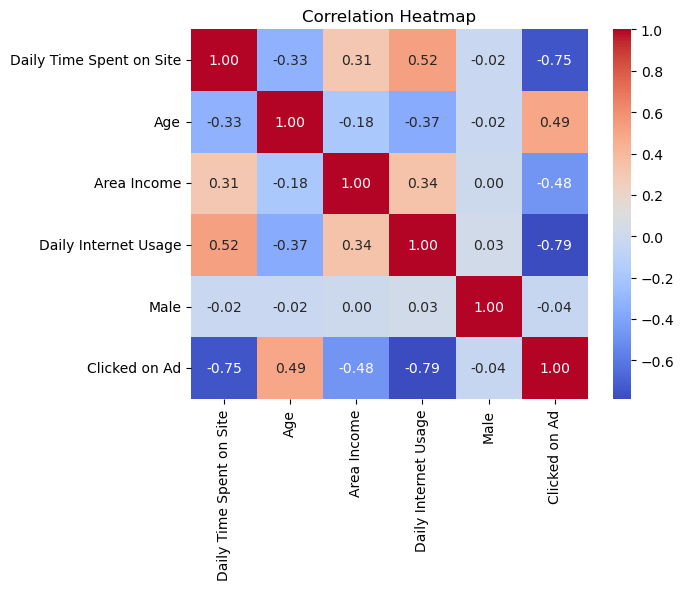

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male','Clicked on Ad']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

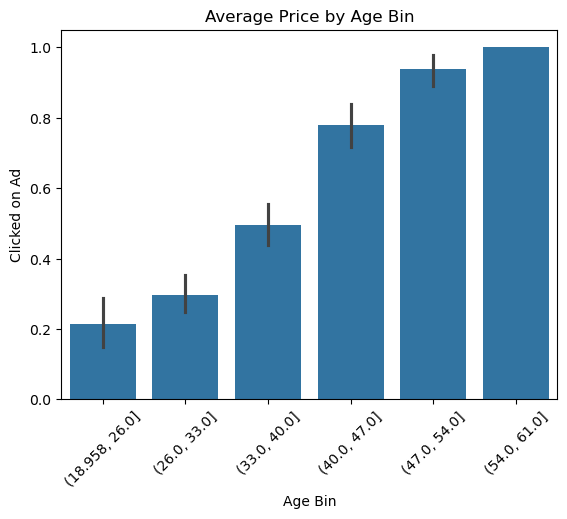

In [24]:
df['Age Bin'] = pd.cut(df['Age'], bins=6)
sns.barplot(x='Age Bin', y='Clicked on Ad', data=df)
plt.title('Average Price by Age Bin')
plt.xticks(rotation=45)
plt.show()

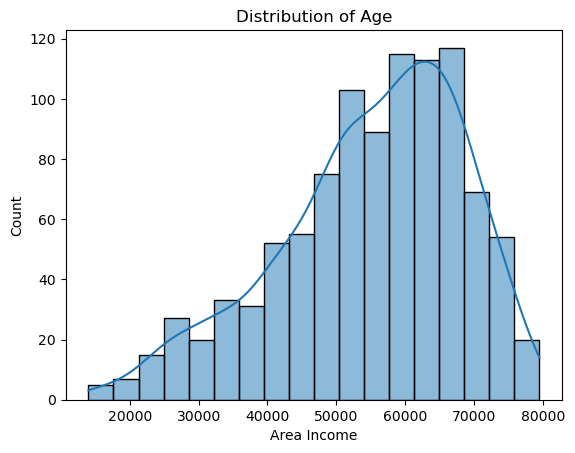

In [26]:
sns.histplot(df['Area Income'], kde=True)
plt.title('Distribution of Age')
plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_13324\514847344.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


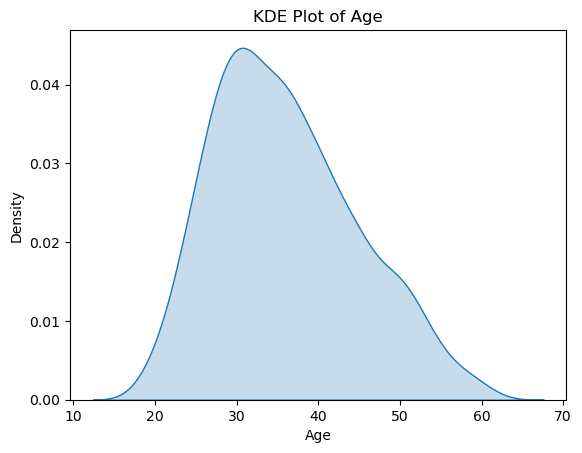

In [28]:
sns.kdeplot(df['Age'], shade=True)
plt.title('KDE Plot of Age')
plt.show()

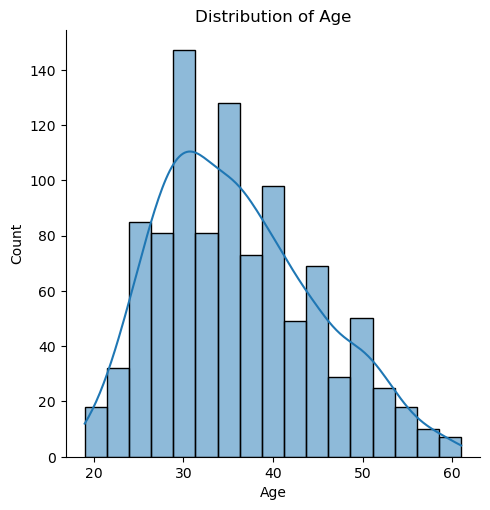

In [30]:
sns.displot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

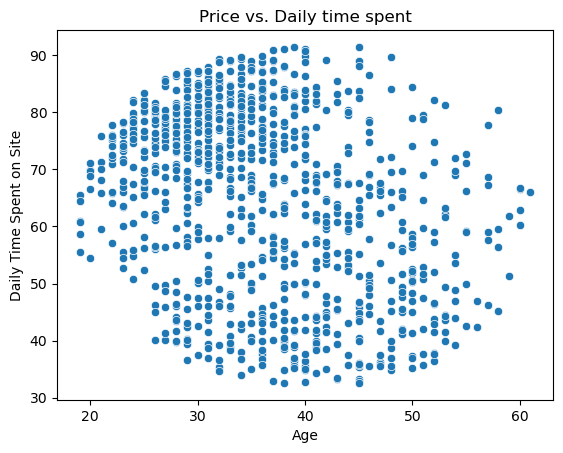

In [33]:
sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=df)
plt.title('Price vs. Daily time spent')
plt.show()

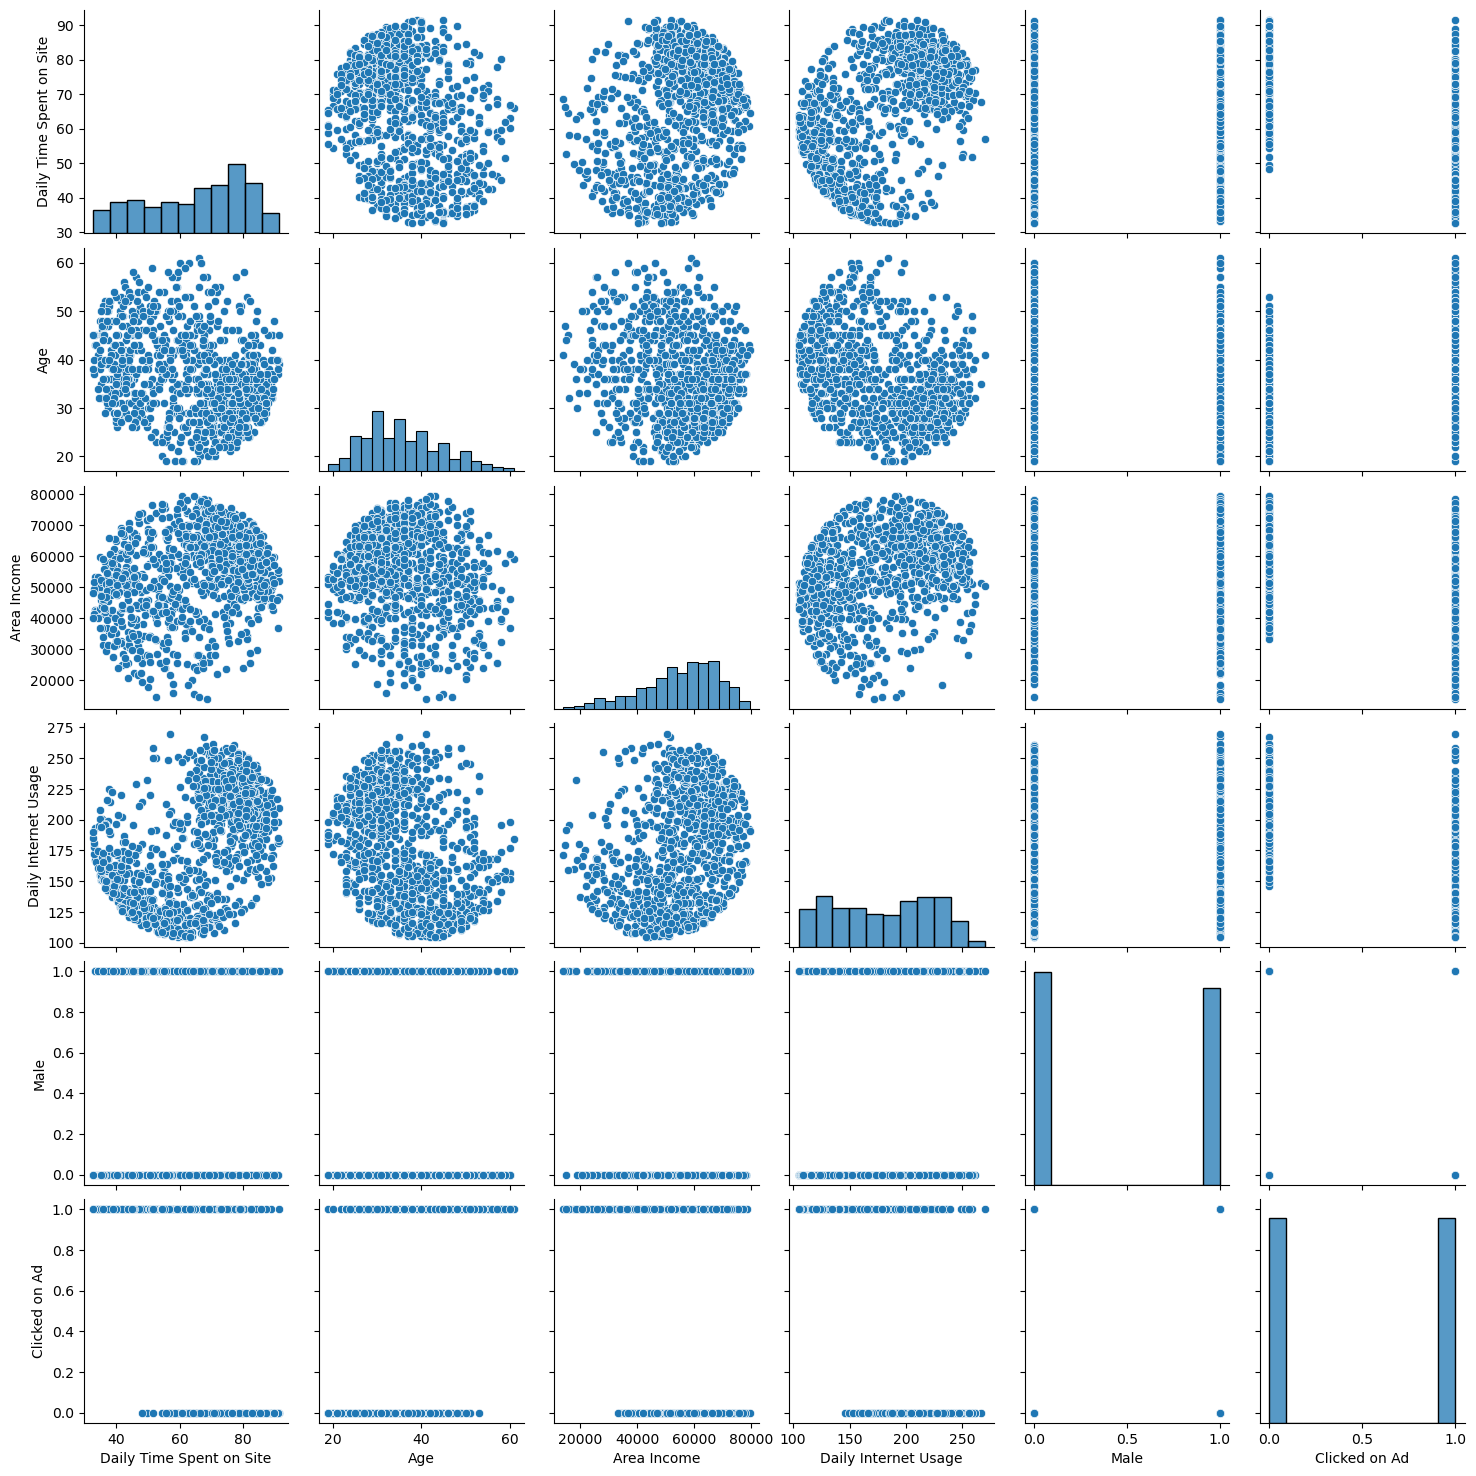

In [35]:
sns.pairplot(df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male','Clicked on Ad']])
plt.show()

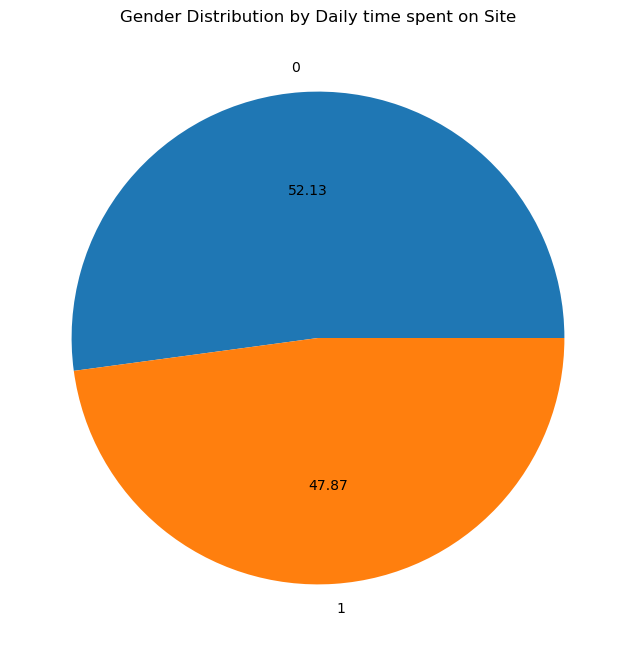

In [36]:
plt.figure(figsize=(8,8))
gender_analysis=df.groupby('Male')['Daily Time Spent on Site'].sum()
plt.pie(gender_analysis,labels=gender_analysis.index,autopct='%.2f')
plt.title('Gender Distribution by Daily time spent on Site')
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Ad Topic Line             1000 non-null   object  
 5   City                      1000 non-null   int32   
 6   Male                      1000 non-null   int64   
 7   Country                   1000 non-null   int32   
 8   Timestamp                 1000 non-null   object  
 9   Clicked on Ad             1000 non-null   int64   
 10  Age Bin                   1000 non-null   category
dtypes: category(1), float64(3), int32(2), int64(3), object(2)
memory usage: 71.7+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [45]:
df['City']=le.fit_transform(df['City'])

In [51]:
df['Country']=le.fit_transform(df['Country'])

In [59]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Age Bin'],
      dtype='object')

In [81]:
X=df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'City', 'Male', 'Country']]

In [83]:
y=df['Clicked on Ad']

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr=LogisticRegression()

In [115]:
lr.fit(X_train,y_train)

C:\Users\anish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
lr_pred=lr.predict(X_test)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn=KNeighborsClassifier()

In [93]:
knn.fit(X,y)

KNeighborsClassifier()

In [95]:
knn_pred=knn.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [121]:
print("*****   KNN   *****")
print(classification_report(y_test,knn_pred))
print("******   Logistic Regressio   ******")
print(classification_report(y_test,lr_pred))

*****   KNN   *****
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        93
           1       0.81      0.73      0.77       107

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

******   Logistic Regressio   ******
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        93
           1       0.96      0.88      0.92       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



In [105]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy=[]
for i in range(2,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

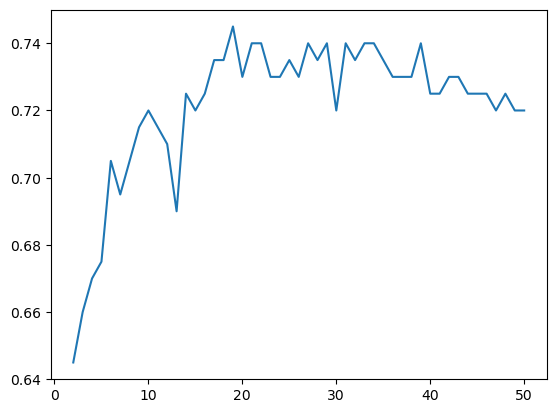

In [109]:
plt.plot(range(2,51),accuracy)